In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
bitcoin_path = "Resources/coin_Bitcoin.csv"
ethereum_path = "Resources/coin_Ethereum.csv"
cardano_path = "Resources/coin_Cardano.csv"
dogecoin_path = "Resources/coin_Dogecoin.csv"
polkadot_path = "Resources/coin_Polkadot.csv"

# Read the crypto history data and form dataframes
bitcoinData = pd.read_csv(bitcoin_path)
ethereumData = pd.read_csv(ethereum_path)
cardanoData = pd.read_csv(cardano_path)
dogecoinData = pd.read_csv(dogecoin_path)
polkadotData = pd.read_csv(polkadot_path)

bitData_df = pd.DataFrame(bitcoinData)
ethData_df = pd.DataFrame(ethereumData)
adaData_df = pd.DataFrame(cardanoData)
dogeData_df = pd.DataFrame(dogecoinData)
dotData_df = pd.DataFrame(polkadotData)


**Profits in comparison to Volume**

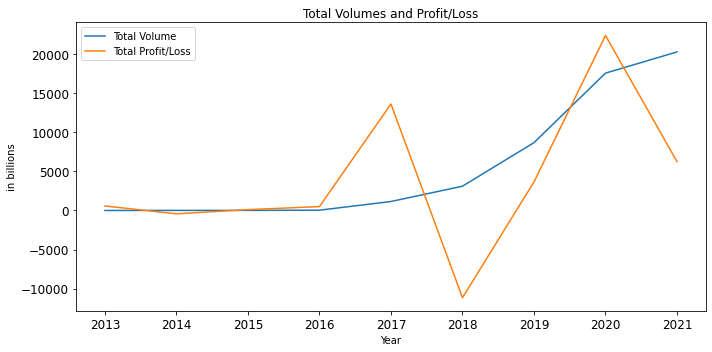

In [2]:
completeData_df = pd.concat([bitData_df,ethData_df,adaData_df,dogeData_df,dotData_df])
completeData_df["Profit/Loss"] = completeData_df["Close"] - completeData_df["Open"]
completeData_df[["Name","High","Low","Open","Close","Profit/Loss"]]
completeData_df["Date"] = pd.to_datetime(completeData_df["Date"], format="%Y-%m-%d %H:%M:%S")
completeData_df["Year"] = completeData_df["Date"].dt.year
tempAC= completeData_df[["Year","Name","Volume","Profit/Loss"]].groupby(["Year","Name"]).sum().reset_index()
shortData_df = tempAC.groupby("Year").sum()
shortData_df["Total Volume"] = shortData_df["Volume"]/1000000000 #in billions
shortData_df["Total Profit/Loss"] = shortData_df["Profit/Loss"]
totalData_df = shortData_df[["Total Volume","Total Profit/Loss"]]
totalVols_df = totalData_df["Total Volume"]
totalPLs_df = totalData_df["Total Profit/Loss"]
# totalData_df.plot()
# totalVols_df.plot(title="Total Coin Volumes", ylabel="Volumes (in billions)",fontsize=12,figsize=(10,5))
totalData_df.plot(title="Total Volumes and Profit/Loss", ylabel="in billions",fontsize=12,figsize=(10,5))
plt.tight_layout()

**Profits in comparison to Market Cap**

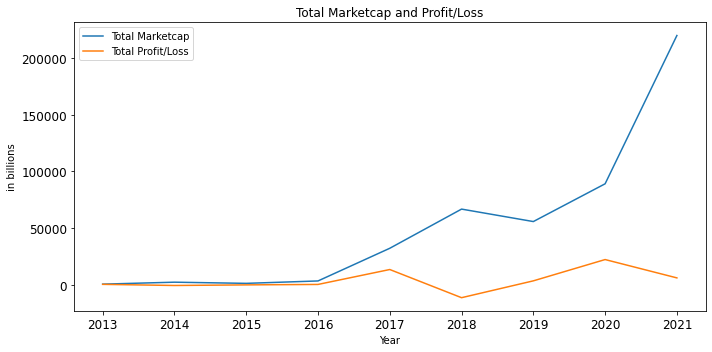

In [3]:
completeData_df = pd.concat([bitData_df,ethData_df,adaData_df,dogeData_df,dotData_df])
completeData_df["Profit/Loss"] = completeData_df["Close"] - completeData_df["Open"]
completeData_df[["Name","High","Low","Open","Close","Profit/Loss"]]
completeData_df["Date"] = pd.to_datetime(completeData_df["Date"], format="%Y-%m-%d %H:%M:%S")
completeData_df["Year"] = completeData_df["Date"].dt.year
tempAC= completeData_df[["Year","Name","Marketcap","Profit/Loss"]].groupby(["Year","Name"]).sum().reset_index()
shortData_df = tempAC.groupby("Year").sum()
shortData_df["Total Marketcap"] = shortData_df["Marketcap"]/1000000000 #in billions
shortData_df["Total Profit/Loss"] = shortData_df["Profit/Loss"]
totalData_df = shortData_df[["Total Marketcap","Total Profit/Loss"]]
totalMCs_df = totalData_df["Total Marketcap"]
totalPLs_df = totalData_df["Total Profit/Loss"]
# totalData_df.plot()
# totalVols_df.plot(title="Total Coin Volumes", ylabel="Volumes (in billions)",fontsize=12,figsize=(10,5))
totalData_df.plot(title="Total Marketcap and Profit/Loss", ylabel="in billions",fontsize=12,figsize=(10,5))
plt.tight_layout()